## Laplace's equation with boundary conditions




### 1. Plot of the exact analytical solution:

In [1]:
# Import libraries

import numpy as np

import matplotlib.pyplot as plt

In [4]:
# Limits:
a = 6*np.pi # for x 
b = np.pi   # for y

# Step sizes
Nx = 100
Ny = 50

dx = a/Nx 
dy = b/Ny

# Vectors
x = np.arange(0, a, dx)
y = np.arange(0, b, dy)

print(x.shape, y.shape)

(100,) (50,)


In [8]:
# Grid - computational domain

X, Y = np.meshgrid(x, y)

print(X.shape, Y.shape)

(50, 100) (50, 100)


### Exact solution

For simplicity, we take: 
$\omega = 1$

In [9]:
def phi_exact(XX, YY):
    
    phi = (np.sin(XX)/np.sin(a))*(np.sinh(YY)/np.sinh(b))
    
    return phi

In [10]:
# Evaluate using our grid

phi_exact_sln =  phi_exact(X, Y)

print(phi_exact_sln.shape)

(50, 100)


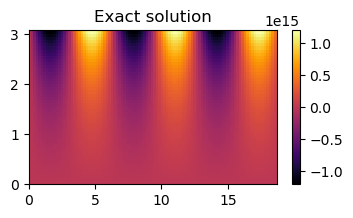

In [35]:
# Plotting

plt.figure(figsize=(4,2))

Z1 = plt.pcolor(X, Y, phi_exact_sln, cmap = 'inferno')

plt.colorbar(Z1)

plt.title("Exact solution")

plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D

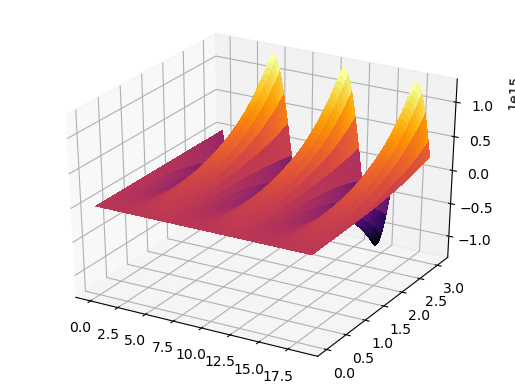

In [17]:
# Plotting
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, phi_exact_sln, cmap = 'inferno', linewidth=0, antialiased=False)

plt.show()

### Numerical solution:

In [18]:
# Coefficient in front:

coef = 0.5/(dx**2 + dy**2)

print(coef)

12.665147955292223


In [20]:
# Empty matrix for the numerical sln

phi_numer = np.zeros((Ny, Nx))

print(phi_numer.shape)

(50, 100)


In [21]:
# Boundary conditions

phi_numer[0, :] = 0.
phi_numer[:, 0] = 0.

phi_numer[-1, :] = np.sin(x)/np.sin(a)
phi_numer[:, -1] = np.sinh(y)/np.sinh(b)

In [23]:
#print(phi_numer)

In [28]:
# For loop to fill up the solution

iter_number = Nx

for k in range(iter_number):

    for j in range(1, Nx -1):
        for i in range(1, Ny - 1):

            phi_numer[i, j] = coef*(dx**2*(phi_numer[i+1, j]\
            + phi_numer[i-1, j]) + dy**2*(phi_numer[i, j+1]\
            + phi_numer[i, j-1]))

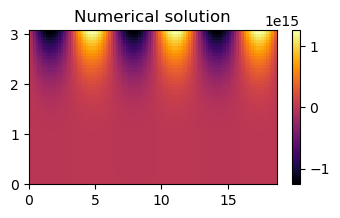

In [36]:
# Plotting

plt.figure(figsize=(4,2))

Z2 = plt.pcolor(X, Y, phi_numer, cmap = 'inferno')

plt.colorbar(Z2)

plt.title("Numerical solution")

plt.show()

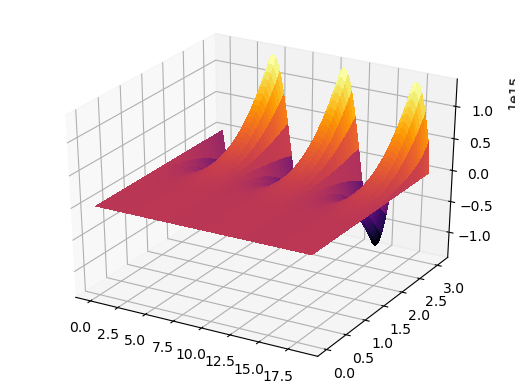

In [31]:
# Plotting
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, phi_numer, cmap = 'inferno', linewidth=0, antialiased=False)

plt.show()

### Error map:

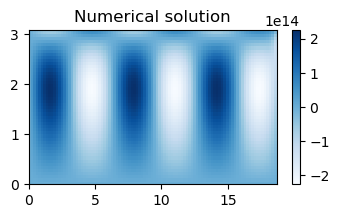

In [38]:
# Plotting

plt.figure(figsize=(4,2))

Z = plt.pcolor(X, Y, phi_numer - phi_exact_sln, cmap = 'Blues')

plt.colorbar(Z)

plt.title("Numerical solution")

plt.show()